In [2]:
import os
import numpy as np
print("numpy version: ", np.__version__)
import matplotlib.pyplot as plt
import librosa
import audiofile as af
import json
import soundfile as sf
import pandas as pd

numpy version:  1.26.4


In [3]:
# go into each json file in the directory and extract the data into a df and create rows with each label at event level with id the id of the subject

# get the list of json files
def read_json_files(directory):
    json_files = [f for f in os.listdir(directory) if f.endswith('.json')]

    list_of_dicts = []
    

    # Loop through each JSON file and load its content into the dictionary
    for json_file in json_files:
        file_path = os.path.join(directory, json_file)
        with open(file_path, 'r', encoding='utf-8') as f:
            data_dict = {}
            data = json.load(f)
            data_dict[json_file] = data
            list_of_dicts.append(data_dict)

    return json_files,data_dict,list_of_dicts

# Specify your directory here
directory_path = 'train_classification_json'
_,_,train_json_list = read_json_files(directory_path)

# print(len(lala))
print(len(train_json_list))
print(train_json_list[5])

1949
{'41283394_2.8_1_p4_2814.json': {'record_annotation': 'Normal', 'event_annotation': [{'start': '1405', 'end': '2683', 'type': 'Normal'}, {'start': '2827', 'end': '4142', 'type': 'Normal'}, {'start': '4250', 'end': '5728', 'type': 'Normal'}, {'start': '5894', 'end': '7153', 'type': 'Normal'}, {'start': '7686', 'end': '9075', 'type': 'Normal'}]}}


In [4]:
# Specify your directory here
directory_path = 'test_classification_json/2022/inter_test_json'
_,_,inter_test_json_list = read_json_files(directory_path)
print(len(inter_test_json_list))

# Specify your directory here
directory_path = 'test_classification_json/2022/intra_test_json'
_,_,intra_test_json_list = read_json_files(directory_path)
print(len(intra_test_json_list))

def get_wav_files(directory):
    wav_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.wav')]
    return wav_files

train_wav_list=get_wav_files('train_classification_wav')
print(len(train_wav_list))
test_wav_list=get_wav_files('test_classification_wav/2022')
print(len(test_wav_list))

355
379
1949
734


In [5]:
# resample all the wav files to 4k into new folders
def resample_wav_files(wav_files, new_folder):
    for wav_file in wav_files:
        y, sr = librosa.load(wav_file)
        y_4k = librosa.resample(y, orig_sr=sr, target_sr=4000)
        new_wav_file = os.path.join(new_folder, os.path.basename(wav_file))
        af.write(new_wav_file, y_4k, 4000, format='wav')

resample_wav_files(train_wav_list, 'train_classification_wav_4k')
resample_wav_files(test_wav_list, 'test_classification_wav_4k')


In [6]:
# get the list of wav files
def get_wav_files(directory):
    wav_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.wav')]
    return wav_files

train_wav_list=get_wav_files('train_classification_wav_4k')
print(len(train_wav_list))

test_wav_list=get_wav_files('test_classification_wav_4k')
print(len(test_wav_list))
# check the sampling rate of one of the files
# read a wav file using audiofile
y, sr = af.read(train_wav_list[2])
print(sr)


1949
734
4000


In [7]:
# calculae the duration of the wav files without using librosa
def get_duration(wav_file):
    with open(wav_file, 'rb') as f:
        f.seek(0, 2)
        num_frames = int(f.tell()/2)
        duration = num_frames / 4000
    return duration

# calculate the duration of all the wav files
def get_durations(wav_files):
    durations = []
    for wav_file in wav_files:
        duration = get_duration(wav_file)
        durations.append(duration)
    return durations

train_durations = get_durations(train_wav_list)
test_durations = get_durations(test_wav_list)

print("The mean duration of the training files is: ", np.mean(train_durations))
print("The mean duration of the test files is: ", np.mean(test_durations))

print("The max duration of the training files is: ", np.max(train_durations))
print("The max duration of the test files is: ", np.max(test_durations))

print("The min duration of the training files is: ", np.min(train_durations))
print("The min duration of the test files is: ", np.min(test_durations))

The mean duration of the training files is:  10.849685608004101
The mean duration of the test files is:  11.244708787465939
The max duration of the training files is:  15.3655
The max duration of the test files is:  15.3655
The min duration of the training files is:  0.30975
The min duration of the test files is:  9.18975


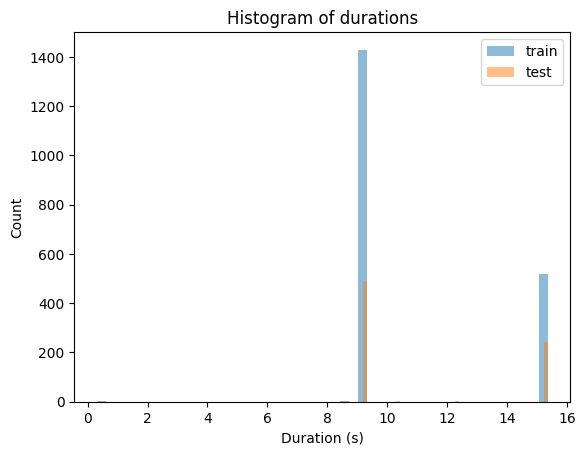

The most common duration of the training files is:  9.22175
The most common duration of the test files is:  9.22175
The unique durations of the training files are:  [ 0.30975  8.51775  9.22175 15.3655 ]
The unique durations of the test files are:  [ 9.18975  9.22175 10.30975 12.37375 15.3655 ]


In [8]:
# plot a histogram of the durations
plt.figure()
plt.hist(train_durations, bins=50, alpha=0.5, label='train')
plt.hist(test_durations, bins=50, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Histogram of durations')
plt.show()

# calculate me the most durations of the files
def get_most_common_duration(durations):
    unique_durations, counts = np.unique(durations, return_counts=True)
    most_common_duration = unique_durations[np.argmax(counts)]
    return most_common_duration,unique_durations

train_most_common_duration,train_unique = get_most_common_duration(train_durations)
test_most_common_duration,test_unique = get_most_common_duration(test_durations)

print("The most common duration of the training files is: ", train_most_common_duration)
print("The most common duration of the test files is: ", test_most_common_duration)

print("The unique durations of the training files are: ", train_unique)
print("The unique durations of the test files are: ", test_unique)

In [9]:
import math
# now as you can see the json files have a field which is like this:"event_annotation": [{"start": "1079", "end": "4933", "type": "Normal"}].I want you to access all the training wav files and segment them as the json file says.Then save them in a new directory with an addition to the name for example seg1,seg2 etc
def create_segmented_wav_files(wav_file, json_file, output_directory):
    # Load the annotations from the JSON file
    with open(json_file, 'r') as f:
        annotations = json.load(f)['event_annotation']
    
    # Load the WAV file
    y, sr = af.read(wav_file)
    
    # Get the base filename without extension
    base_filename = os.path.splitext(os.path.basename(wav_file))[0]
    
    # Process each annotation and save the corresponding segment
    for i, annotation in enumerate(annotations):
        start_ms = int(annotation['start'])
        end_ms = int(annotation['end'])
        start_sample= int(start_ms * sr / 1000)
        end_sample = int(end_ms * sr / 1000)
        
        # Extract the segment
        segment = y[start_sample:end_sample]
        
        # Create the output filename and also add the label that is in the json file
        output_filename = f"{base_filename}_seg{i+1}_{annotation['type']}.wav"
        output_path = os.path.join(output_directory, output_filename)
        
        # Save the segment as a new WAV file
        sf.write(output_path, segment, sr)
        # print(f"Saved segment {i+1} to {output_path}")



In [10]:
delete_files = [f for f in os.listdir('splitted_training') if f.endswith('.wav')]
for f in delete_files:
    os.remove(os.path.join('splitted_training', f))

delete_files = [f for f in os.listdir('splitted_inter_testing') if f.endswith('.wav')]
for f in delete_files:
    os.remove(os.path.join('splitted_inter_testing', f))

delete_files = [f for f in os.listdir('splitted_intra_testing') if f.endswith('.wav')]
for f in delete_files:
    os.remove(os.path.join('splitted_intra_testing', f))

In [11]:
# now for every wav file in the directory create the segments
for wav_file in train_wav_list:
    # Get the corresponding JSON file
    json_file = os.path.join('train_classification_json', os.path.splitext(os.path.basename(wav_file))[0] + '.json')
    
    # Create the segmented WAV files
    create_segmented_wav_files(wav_file, json_file, 'splitted_training')

In [12]:
train_wav_list_splitted=get_wav_files('splitted_training')
print(len(train_wav_list_splitted))
train_durations = get_durations(train_wav_list_splitted)

print(f"The mean duration of the training files is: {np.mean(train_durations):.3f}")

print(f"The max duration of the training files is: {np.max(train_durations):.3f}")

print(f"The min duration of the training files is: {np.min(train_durations):.3f}")


6656
The mean duration of the training files is: 1.284
The max duration of the training files is: 7.157
The min duration of the training files is: 0.132


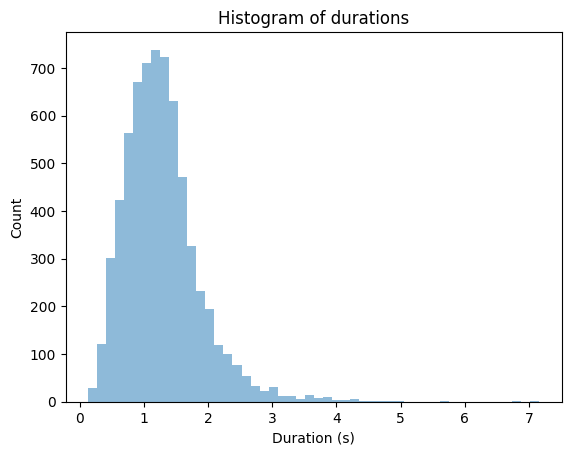

The most common duration of the training files is:  1.0485
The most common duration of the test files is:  9.22175
The unique durations of the training files are:  [0.1315 0.1425 0.1445 ... 5.7075 6.8745 7.1575]
The unique durations of the test files are:  [ 9.18975  9.22175 10.30975 12.37375 15.3655 ]


In [13]:
# plot a histogram of the durations
plt.figure()
plt.hist(train_durations, bins=50, alpha=0.5, label='train')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.title('Histogram of durations')
plt.show()

# calculate me the most durations of the files
def get_most_common_duration(durations):
    unique_durations, counts = np.unique(durations, return_counts=True)
    most_common_duration = unique_durations[np.argmax(counts)]
    return most_common_duration,unique_durations

train_most_common_duration,train_unique = get_most_common_duration(train_durations)
test_most_common_duration,test_unique = get_most_common_duration(test_durations)

print("The most common duration of the training files is: ", train_most_common_duration)
print("The most common duration of the test files is: ", test_most_common_duration)

print("The unique durations of the training files are: ", train_unique)
print("The unique durations of the test files are: ", test_unique)

In [14]:
# now for every wav file in the directory create the segments
for wav_file in test_wav_list:
    # Get the corresponding JSON file
    json_file = os.path.join('train_classification_json', os.path.splitext(os.path.basename(wav_file))[0] + '.json')
    # check if the json file exists in a specific directory
    if not os.path.exists(json_file):
        json_file = os.path.join('test_classification_json/2022/inter_test_json', os.path.splitext(os.path.basename(wav_file))[0] + '.json')
        if not os.path.exists(json_file):
            json_file = os.path.join('test_classification_json/2022/intra_test_json', os.path.splitext(os.path.basename(wav_file))[0] + '.json')
    # # Create the segmented WAV files
    # create_segmented_wav_files(wav_file, json_file, 'splitted_training')
    # check if it is intraa or inter 
    if 'inter' in json_file:
        create_segmented_wav_files(wav_file, json_file, 'splitted_inter_testing')
    elif 'intra' in json_file:
        create_segmented_wav_files(wav_file, json_file, 'splitted_intra_testing')
    # else:
    #     create_segmented_wav_files(wav_file, json_file, 'splitted_test')

In [15]:
test_inter_wav_list_splitted=get_wav_files('splitted_inter_testing')
print(len(test_inter_wav_list_splitted))
test_inter_durations = get_durations(test_inter_wav_list_splitted)

print(f"The mean duration of the training files is: {np.mean(test_inter_durations):.3f}")

print(f"The max duration of the training files is: {np.max(test_inter_durations):.3f}")

print(f"The min duration of the training files is: {np.min(test_inter_durations):.3f}")

1429
The mean duration of the training files is: 1.401
The max duration of the training files is: 4.973
The min duration of the training files is: 0.247


In [16]:
test_intra_wav_list_splitted=get_wav_files('splitted_intra_testing')
print(len(test_intra_wav_list_splitted))
test_intra_durations = get_durations(test_intra_wav_list_splitted)

print(f"The mean duration of the training files is: {np.mean(test_intra_durations):.3f}")

print(f"The max duration of the training files is: {np.max(test_intra_durations):.3f}")

print(f"The min duration of the training files is: {np.min(test_intra_durations):.3f}")

1004
The mean duration of the training files is: 1.336
The max duration of the training files is: 5.670
The min duration of the training files is: 0.237


In [17]:
print(f"The mean duration of all durations is: {np.mean(train_durations + test_inter_durations + test_intra_durations):.3f}")

print(f"The max duration of all durations is: {np.max(train_durations + test_inter_durations + test_intra_durations):.3f}")

print(f"The min duration of all durations is: {np.min(train_durations + test_inter_durations + test_intra_durations):.3f}")

The mean duration of all durations is: 1.308
The max duration of all durations is: 7.157
The min duration of all durations is: 0.132


In [18]:
# read the wav file from folder splitted training and return X and y where X is the wav file and y is the label that is the last word of the name of the wav
def create_X_y(wav_file):
    y, sr = af.read(wav_file)
    label = os.path.splitext(os.path.basename(wav_file))[0].split('_')[-1]
    return y, label

def create_X_y_list(wav_files):
    X = []
    y = []
    for wav_file in wav_files:
        y_, label = create_X_y(wav_file)
        X.append(y_)
        y.append(label)
    return X, y

X_train, y_train = create_X_y_list(train_wav_list_splitted)

print(X_train[0])
print((y_train))

[-0.00323486 -0.00265503 -0.0020752  ... -0.00091553 -0.00036621
  0.00012207]
['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Fine Crackle', 'Fine Crackle', 'Normal', 'Wheeze', 'Normal', 'Normal', 'Normal', 'Wheeze', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Normal', 'Wheeze', 'Normal', 'Normal', 'Wheeze', 'Normal', 'Wheeze', 'Normal', 'Fine Crackle', 'Fine Crackle', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Wheeze', 'Normal', 'Fine Crackle', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Fine Crackle'

In [19]:
def pad_to_max_duration(X, durations,max_duration=None):
    if max_duration is None:
        max_duration = len(X_train[np.argmax(train_durations)])
    padded_list = []
    for y in X:
        pad_width = max_duration - len(y)
        pad_before = pad_width // 2
        pad_after = pad_width - pad_before

        y_padded = np.pad(y, (pad_before, pad_after), mode='constant')
        padded_list.append(y_padded)

    return np.array(padded_list)


In [20]:
X_train_padded = pad_to_max_duration(X=X_train, durations=train_durations)


# combined_array = np.column_stack((X_train_padded, y_train))

# np.savetxt('train_classification.csv', combined_array, delimiter=',', fmt='%s')

In [21]:
# # load back the csv file
# df = pd.read_csv('train_classification.csv', header=None)
# X_train_padded_read = df.iloc[:, :-1].values
# y_train_read = df.iloc[:, -1].values

In [22]:
# calculate the duration of the wav files
def get_duration(y):
    return len(y) / 4000

# calculate the duration of all the wav files
def get_durations(X):
    durations = []
    for y in X:
        duration = get_duration(y)
        durations.append(duration)
    return durations

train_durations = get_durations(X_train_padded)
print(f"The mean duration of the training files is: {np.mean(train_durations):.3f}")

The mean duration of the training files is: 7.152


In [23]:
# get inter test durations
X_test_inter, y_test_inter = create_X_y_list(test_inter_wav_list_splitted)
x_test_durations=get_durations(X_test_inter)
print(f"The mean duration of the test files is: {np.mean(x_test_durations):.3f}")
print(f"The max duration of the test files is: {np.max(x_test_durations):.3f}")

The mean duration of the test files is: 1.396
The max duration of the test files is: 4.967


In [24]:
# do the same for inter test but pad the files to the max duration of the training files
X_test_inter, y_test_inter = create_X_y_list(test_inter_wav_list_splitted)
X_test_inter_padded = pad_to_max_duration(X=X_test_inter,durations= x_test_durations,max_duration=len(X_train_padded[0]))



In [25]:
print(f"The mean duration of the test files is: {np.mean(get_durations(X_test_inter_padded)):.3f}")
print(f"The max duration of the test files is: {np.max(get_durations(X_test_inter_padded)):.3f}")
print(f"The min duration of the test files is: {np.min(get_durations(X_test_inter_padded)):.3f}")

The mean duration of the test files is: 7.152
The max duration of the test files is: 7.152
The min duration of the test files is: 7.152


In [26]:
# save in csv file
combined_array = np.column_stack((X_test_inter_padded, y_test_inter))
np.savetxt('test_inter_classification.csv', combined_array, delimiter=',', fmt='%s')


In [27]:
# save both in npz files
np.savez('train_classification.npz', X=X_train_padded, y=y_train)
np.savez('test_inter_classification.npz', X=X_test_inter_padded, y=y_test_inter)

In [28]:
# do the same for intra test but pad the files to the max duration of the training files
X_test_intra, y_test_intra = create_X_y_list(test_intra_wav_list_splitted)
X_test_intra_padded = pad_to_max_duration(X=X_test_intra,durations= x_test_durations,max_duration=len(X_train_padded[0]))

print(f"The mean duration of the test files is: {np.mean(get_durations(X_test_intra_padded)):.3f}")
print(f"The max duration of the test files is: {np.max(get_durations(X_test_intra_padded)):.3f}")
print(f"The min duration of the test files is: {np.min(get_durations(X_test_intra_padded)):.3f}")

# save in npz file



The mean duration of the test files is: 7.152
The max duration of the test files is: 7.152
The min duration of the test files is: 7.152


In [29]:
# read all the samples and the samples that are not labeled as normal,duplicate them and add them to the dataset and save this dataset to a different .npz file
# read the npz file
data = np.load('train_classification.npz')
X_train_padded = data['X']
y_train = data['y']

# get the indices of the samples that are not labeled as normal
indices = [i for i, label in enumerate(y_train) if label != 'Normal']
# get the samples that are not labeled as normal
X_train_padded_abnormal = X_train_padded[indices]
y_train_abnormal = y_train[indices]

# duplicate the abnormal samples
num_duplicates = 2
X_train_padded_abnormal_duplicated = np.repeat(X_train_padded_abnormal, num_duplicates, axis=0)
y_train_abnormal_duplicated = np.repeat(y_train_abnormal, num_duplicates, axis=0)

# combine the normal and abnormal samples
X_train_padded_combined = np.concatenate((X_train_padded, X_train_padded_abnormal_duplicated))
y_train_combined = np.concatenate((y_train, y_train_abnormal_duplicated))

# print the distribution of the labels
unique_labels, counts = np.unique(y_train_combined, return_counts=True)
print(dict(zip(unique_labels, counts)))

# save the combined dataset
np.savez('train_classification_combined.npz', X=X_train_padded_combined, y=y_train_combined)